In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
# Load the dataset
file_path = 'benckmark-fullem.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,emotion,name,Happiness/Sadness,Hopeful/Uncertainty,Secure/Insecure,assignedLands,contractor,cropSize,currentActivity,currentDay,...,pesticidesAvailable,purpose,rainfallConditions,robberyAccount,seeds,timeLeftOnDay,toPay,tools,totalHarvestedWeight,waterAvailable
0,no,PeasantFamily_27,0.9906,0.9703,0.9703,"[{'farmName': 'farm_24_medium', 'landName': 'l...",NaN,0,NONE,366,...,0,farmer,normal,0,783,24,0,10,8975.174803,1903
1,no,PeasantFamily_72,0.9897,0.9304,0.9304,"[{'farmName': 'farm_4_large', 'landName': 'lan...",NaN,0,NONE,366,...,0,farmer,normal,0,830,24,0,10,9185.847757,1950
2,no,PeasantFamily_62,0.9909,0.9306,0.9306,"[{'farmName': 'farm_2_large', 'landName': 'lan...",NaN,0,NONE,366,...,0,farmer,normal,0,783,24,0,10,8185.746329,1903
3,no,PeasantFamily_15,0.9905,0.9705,0.9705,"[{'farmName': 'farm_61_small', 'landName': 'la...",NaN,1,NONE,307,...,0,farmer,normal,0,965,24,0,10,6511.435162,815
4,no,PeasantFamily_32,0.9906,0.9503,0.9503,"[{'farmName': 'farm_73_small', 'landName': 'la...",NaN,1,NONE,307,...,0,farmer,normal,0,1017,24,0,10,5637.739375,837


In [3]:
df.tail()

,emotion,name,Happiness/Sadness,Hopeful/Uncertainty,Secure/Insecure,assignedLands,contractor,cropSize,currentActivity,currentDay,...,pesticidesAvailable,purpose,rainfallConditions,robberyAccount,seeds,timeLeftOnDay,toPay,tools,totalHarvestedWeight,waterAvailable
7495,si,PeasantFamily_73,0.9905,0.9103,0.9103,"[{'farmName': 'farm_42_small', 'landName': 'la...",NaN,0,NONE,366,...,0,farmer,normal,0,860,24,0,10,7734.878584,1960
7496,si,PeasantFamily_13,0.9902,0.9302,0.9302,"[{'farmName': 'farm_72_small', 'landName': 'la...",NaN,1,NONE,366,...,0,farmer,normal,0,905,24,0,10,7702.622034,25
7497,si,PeasantFamily_15,0.9902,0.9504,0.9504,"[{'farmName': 'farm_73_small', 'landName': 'la...",NaN,1,NONE,366,...,0,farmer,normal,0,950,24,0,10,5656.069521,350
7498,si,PeasantFamily_46,0.9903,0.9305,0.9305,"[{'farmName': 'farm_25_medium', 'landName': 'l...",NaN,1,NONE,366,...,0,farmer,normal,0,904,24,0,10,9033.624628,24
7499,si,PeasantFamily_70,0.9905,0.9674,0.9674,"[{'farmName': 'farm_61_small', 'landName': 'la...",NaN,1,NONE,366,...,0,farmer,normal,0,992,24,0,10,5522.550514,392


In [4]:
# Check if 'initialMoney' column exists in the dataframe
if 'initialMoney' in df.columns:
    # Calculate the average of initialMoney
    initial_money_avg = df['initialMoney'].mean()

    # Splitting the dataset into three groups based on initialMoney
    high_group = df[df['initialMoney'] > initial_money_avg]
    medium_group = df[df['initialMoney'] == initial_money_avg]
    low_group = df[df['initialMoney'] < initial_money_avg]

    initial_money_avg, high_group.shape[0], medium_group.shape[0], low_group.shape[0]
else:
    initial_money_avg, high_group, medium_group, low_group = None, None, None, None

initial_money_avg, high_group, medium_group, low_group

(2201312.6526666665,
      emotion              name  Happiness/Sadness  Hopeful/Uncertainty  \
 3         no  PeasantFamily_15             0.9905               0.9705   
 4         no  PeasantFamily_32             0.9906               0.9503   
 8         no  PeasantFamily_25             0.9906               0.9305   
 13        no   PeasantFamily_6             0.9904               0.9302   
 14        no  PeasantFamily_10             0.9907               0.9706   
 ...      ...               ...                ...                  ...   
 7493      si  PeasantFamily_20             0.9903               0.9702   
 7496      si  PeasantFamily_13             0.9902               0.9302   
 7497      si  PeasantFamily_15             0.9902               0.9504   
 7498      si  PeasantFamily_46             0.9903               0.9305   
 7499      si  PeasantFamily_70             0.9905               0.9674   
 
       Secure/Insecure                                      assignedLands  \


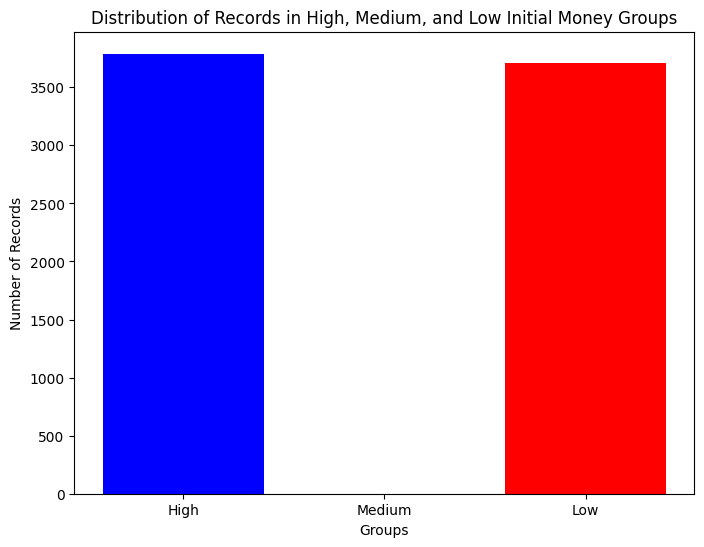

In [5]:
# Prepare data for plotting
groups = ['High', 'Medium', 'Low']
counts = [high_group.shape[0], medium_group.shape[0], low_group.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(groups, counts, color=['blue', 'green', 'red'])
plt.xlabel('Groups')
plt.ylabel('Number of Records')
plt.title('Distribution of Records in High, Medium, and Low Initial Money Groups')
plt.show()

In [6]:
# Re-attempting to extract the postfix (small, medium, large) from the peasantFamilyLandAlias column
# and applying this extraction to the entire dataframe, then to each group
df['landSize'] = df['peasantFamilyLandAlias'].apply(lambda x: x.split('_')[-1] if '_' in x else None)

# Adding the extracted landSize column to each group
high_group['landSize'] = df['landSize']
medium_group['landSize'] = df['landSize']
low_group['landSize'] = df['landSize']

# Dividing each group (high, medium, low) into three subgroups based on landSize
high_group_sub = high_group.groupby('landSize').size()
medium_group_sub = medium_group.groupby('landSize').size()
low_group_sub = low_group.groupby('landSize').size()

# Combining the subgroup sizes for plotting
subgroups = pd.concat([high_group_sub, medium_group_sub, low_group_sub], axis=1)
subgroups.columns = ['High', 'Medium', 'Low']
subgroups.fillna(0, inplace=True)  # Replace NaN with 0 for groups with no data

subgroups

/tmp/ipykernel_378716/2241908077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_group['landSize'] = df['landSize']
/tmp/ipykernel_378716/2241908077.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_group['landSize'] = df['landSize']


,High,Medium,Low
landSize,,,
large,865,1700,835
medium,1008,2000,992
small,1916,3800,1884


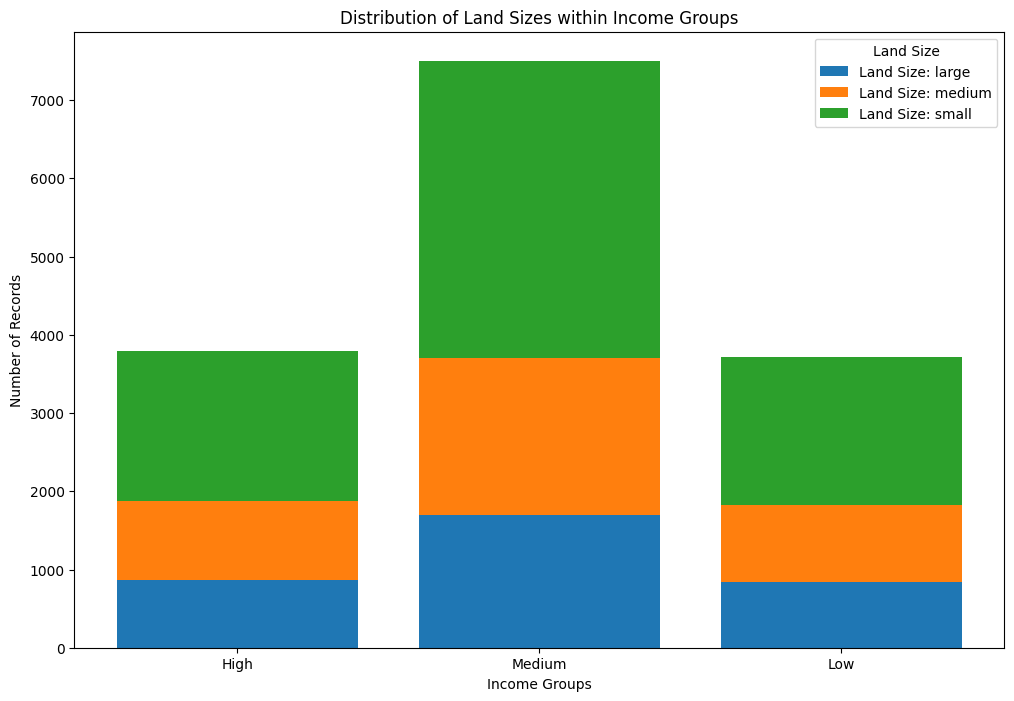

In [7]:
# Plotting the distribution of subgroups within each group
plt.figure(figsize=(12, 8))

# Plot for each land size category
for i, land_size in enumerate(subgroups.index):
    plt.bar(subgroups.columns, subgroups.loc[land_size], bottom=subgroups.loc[subgroups.index[:i]].sum(), label=f'Land Size: {land_size}')

plt.xlabel('Income Groups')
plt.ylabel('Number of Records')
plt.title('Distribution of Land Sizes within Income Groups')
plt.legend(title='Land Size')
plt.show()

In [9]:
# Analyzing the behavior of 'money' in each group, considering the 'Emotions' column

# Grouping and calculating the average 'money' for each subgroup (high, medium, low) and emotion status
average_money_by_group_emotion = df.groupby(['landSize', 'emotion'])['money'].mean().unstack()

average_money_by_group_emotion

emotion,no,si
landSize,,
large,1.945531e+06,1.930954e+06
medium,2.290846e+06,2.237687e+06
small,1.684550e+06,1.684085e+06


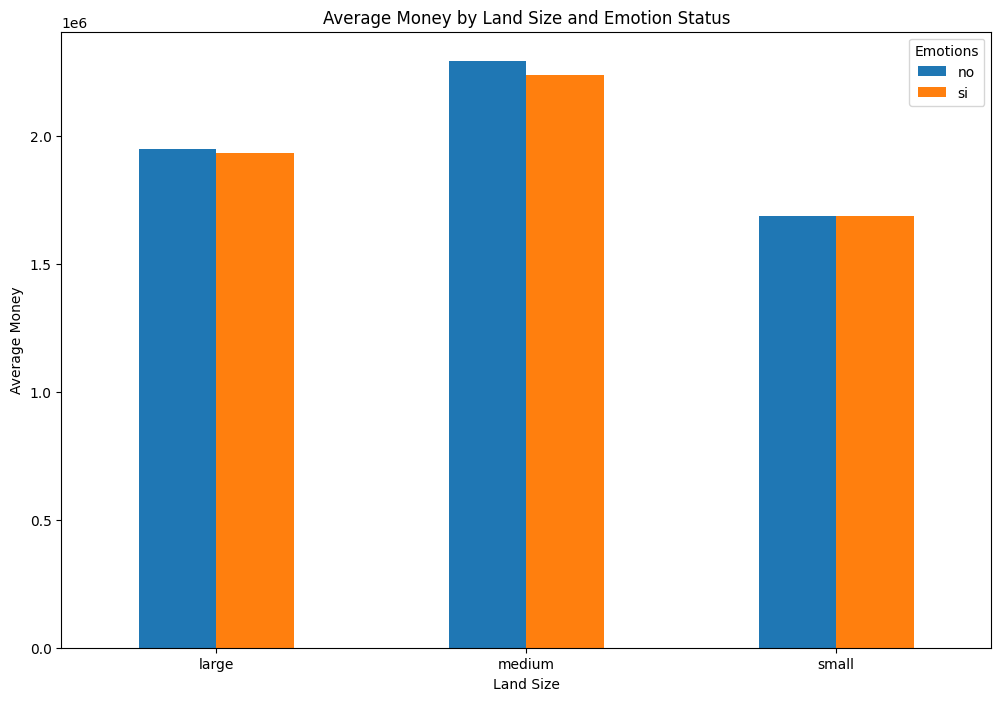

In [10]:
# Plotting the average money by land size and emotion status

average_money_by_group_emotion.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Land Size')
plt.ylabel('Average Money')
plt.title('Average Money by Land Size and Emotion Status')
plt.xticks(rotation=0)
plt.legend(title='Emotions')
plt.show()

In [12]:
# Re-attempting to clean the 'totalHarvestedWeight' data
# It seems the data contains periods as thousand separators. We'll remove them before converting to float.
df['totalHarvestedWeight_clean'] = df['totalHarvestedWeight'].astype(float)

# Grouping and calculating the average 'totalHarvestedWeight' for each subgroup and emotion status
average_harvest_by_group_emotion = df.groupby(['landSize', 'emotion'])['totalHarvestedWeight_clean'].mean().unstack()

average_harvest_by_group_emotion

emotion,no,si
landSize,,
large,8407.616481,8380.024217
medium,8609.008416,8550.671647
small,6848.942940,6848.347340


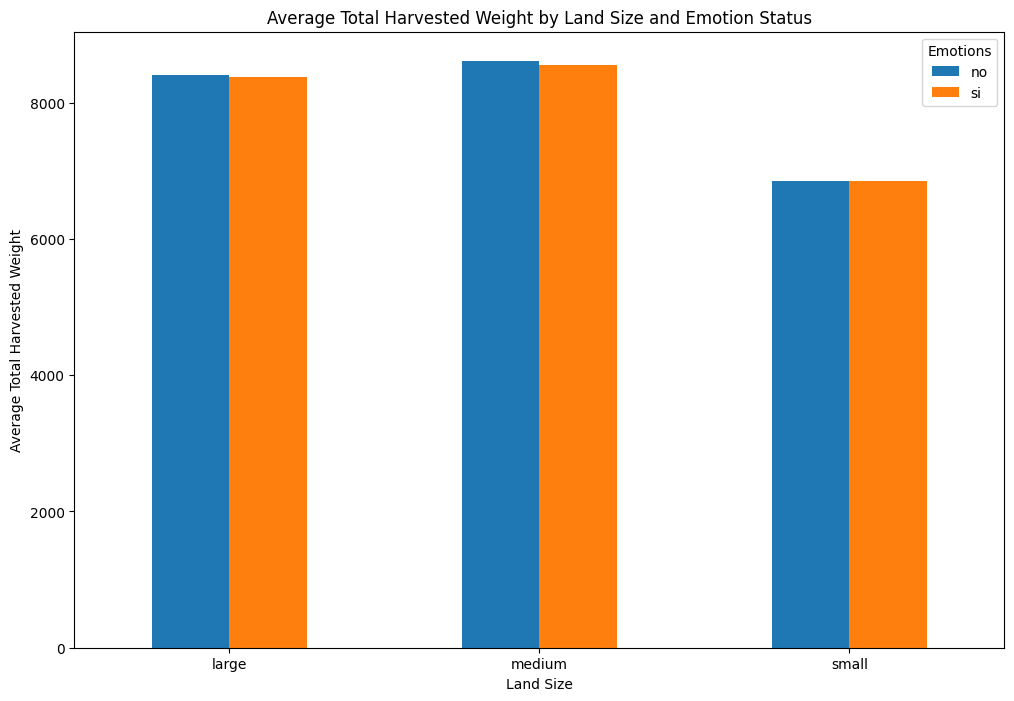

In [13]:
# Plotting the average totalHarvestedWeight by land size and emotion status

average_harvest_by_group_emotion.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Land Size')
plt.ylabel('Average Total Harvested Weight')
plt.title('Average Total Harvested Weight by Land Size and Emotion Status')
plt.xticks(rotation=0)
plt.legend(title='Emotions')
plt.show()

In [15]:
# ANOVA analysis for 'totalHarvestedWeight' across different 'landSize' and 'Emotions' groups

# Preparing the data for ANOVA
# Creating a new column that combines landSize and Emotions for ANOVA grouping
df['group'] = df['landSize'] + "_" + df['emotion']

# Performing ANOVA
anova_model = ols('totalHarvestedWeight_clean ~ C(group)', data=df).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)

anova_result

,sum_sq,df,F,PR(>F)
C(group),5.111199e+09,5.0,619.587944,0.0
Residual,1.236413e+10,7494.0,NaN,NaN


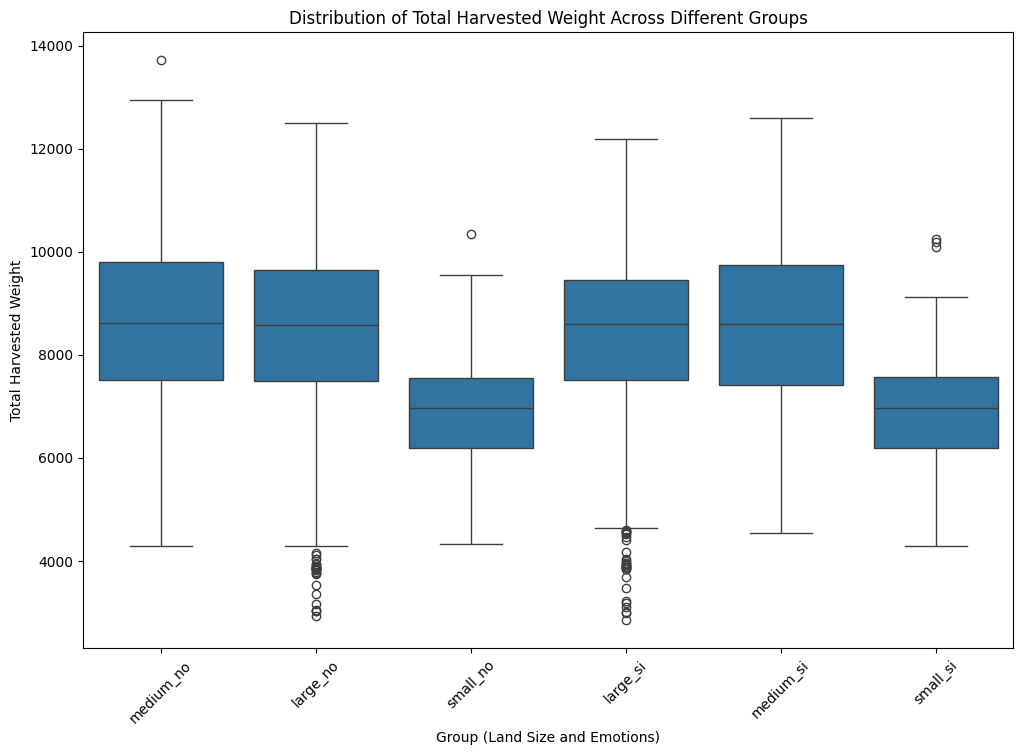

In [16]:
# Plotting the data to visualize the ANOVA findings
plt.figure(figsize=(12, 8))

# Boxplot to show distribution of totalHarvestedWeight_clean across different groups
sns.boxplot(x='group', y='totalHarvestedWeight_clean', data=df)

plt.xlabel('Group (Land Size and Emotions)')
plt.ylabel('Total Harvested Weight')
plt.title('Distribution of Total Harvested Weight Across Different Groups')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Redefining the ANOVA analysis for 'initialMoney' and 'money' based on 'Emotions'

# Performing ANOVA for 'initialMoney'
anova_initial_money = ols('initialMoney ~ C(emotion)', data=df).fit()
anova_result_initial_money = sm.stats.anova_lm(anova_initial_money, typ=2)

# Performing ANOVA for 'money'
anova_money = ols('money ~ C(emotion)', data=df).fit()
anova_result_money = sm.stats.anova_lm(anova_money, typ=2)

anova_result_initial_money, anova_result_money

(                  sum_sq      df        F    PR(>F)
 C(emotion)  2.210708e+10     1.0  1.37989  0.240157
 Residual    1.201247e+14  7498.0      NaN       NaN,
                   sum_sq      df         F    PR(>F)
 C(emotion)  5.884539e+11     1.0  0.936403  0.333236
 Residual    4.711888e+15  7498.0       NaN       NaN)

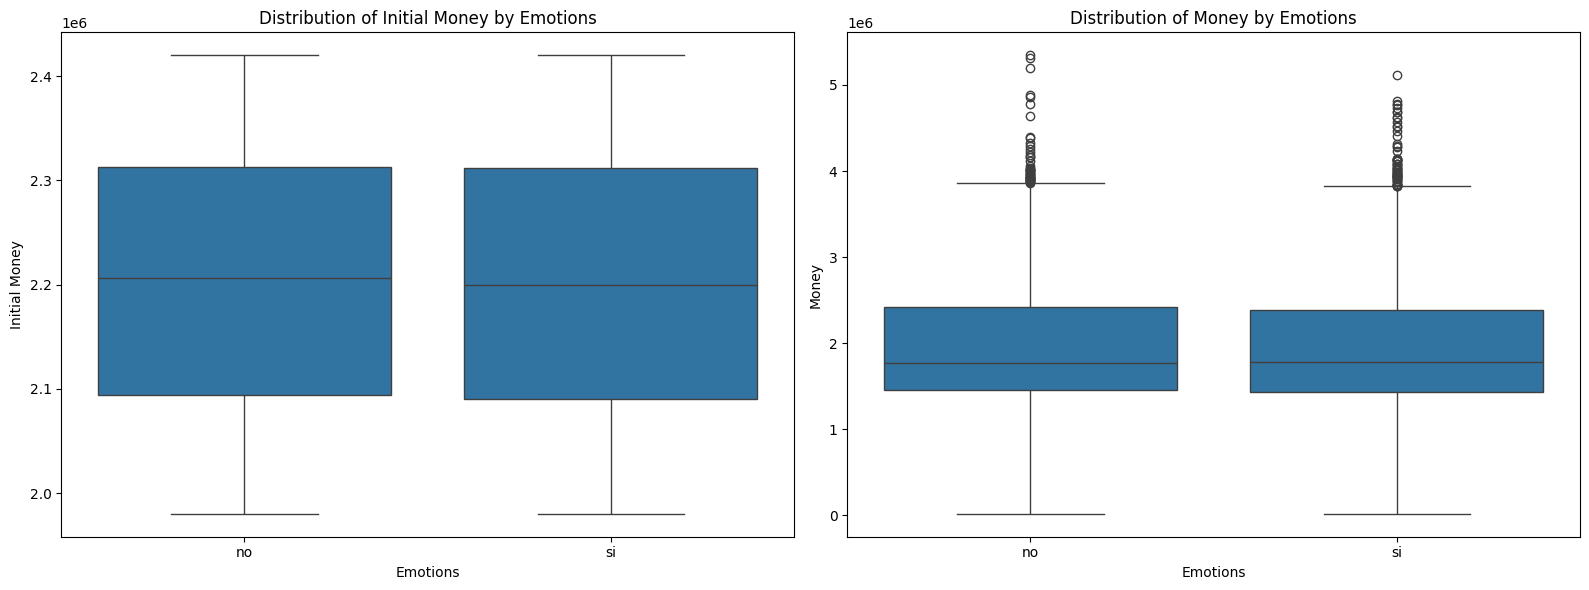

In [21]:
# Plotting the data to visualize the ANOVA findings for 'initialMoney' and 'money'
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for 'initialMoney' by Emotions
sns.boxplot(ax=axes[0], x='emotion', y='initialMoney', data=df)
axes[0].set_title('Distribution of Initial Money by Emotions')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Initial Money')

# Boxplot for 'money' by Emotions
sns.boxplot(ax=axes[1], x='emotion', y='money', data=df)
axes[1].set_title('Distribution of Money by Emotions')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Money')

plt.tight_layout()
plt.show()